In [50]:
import pandas as pd

In [51]:
weather = pd.read_csv("local_weather.csv", index_col = "DATE")

In [52]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


# Preparing The Data

In [53]:
weather.apply(pd.isnull).sum() / weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

In [54]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [55]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [56]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


# Filling In Missing Values

In [57]:
core_weather.apply(pd.isnull).sum() / core_weather.shape[0]

precip        0.016668
snow          0.324990
snow_depth    0.317634
temp_max      0.000534
temp_min      0.000593
dtype: float64

In [58]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [59]:
del core_weather["snow"]

In [60]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [61]:
del core_weather["snow_depth"]

In [62]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [63]:
core_weather.loc["1983-10-20":"1983-11-05",:]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [64]:
core_weather["precip"].value_counts()

0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: precip, Length: 176, dtype: int64

In [65]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [66]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [67]:
core_weather = core_weather.fillna(method = "ffill")

In [68]:
core_weather.apply(pd.isnull).sum() / core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

# Verifying The Correct Data Types

In [69]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [70]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [71]:
core_weather.index = pd.to_datetime(core_weather.index)

In [72]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [73]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

# Analyze Weather Data

<AxesSubplot:xlabel='DATE'>

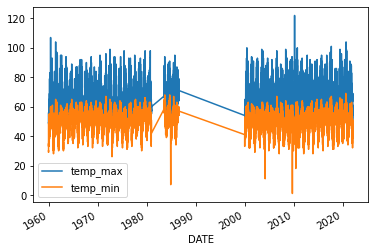

In [74]:
core_weather[["temp_max", "temp_min"]].plot()

In [75]:
core_weather.index.year.value_counts().sort_index

<bound method Series.sort_index of 1960    366
1972    366
2016    366
2008    366
2004    366
2020    366
1980    366
1976    366
1984    366
1964    366
1968    366
2011    365
2005    365
2006    365
2007    365
1963    365
2009    365
2010    365
1969    365
2003    365
2013    365
2014    365
2015    365
1962    365
2017    365
2018    365
2012    365
2002    365
1970    365
1978    365
1971    365
1973    365
1974    365
1975    365
1967    365
1977    365
1979    365
2001    365
1966    365
1965    365
1985    365
1961    365
2000    365
2019    365
2021    364
1986    212
1983    184
2022     28
Name: DATE, dtype: int64>

<AxesSubplot:xlabel='DATE'>

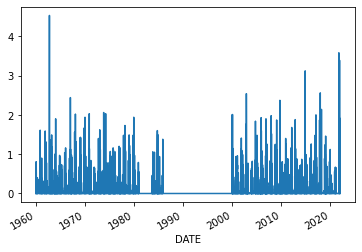

In [76]:
core_weather["precip"].plot()

<AxesSubplot:xlabel='DATE'>

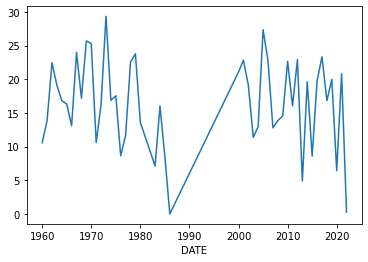

In [126]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [123]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [124]:
weather["target"] = weather.shift(-1)["AWND"]

In [125]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18,target
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.70
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.68
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.13


In [77]:
core_weather.groupby(core_weather.index.year).sum()

,precip,temp_max,temp_min
DATE,,,
1960,14.01,24135.0,17973.0
1961,13.87,24202.0,17819.0
1962,22.47,23785.0,17880.0
1963,19.11,23470.0,18237.0
1964,16.83,23013.0,18637.0
1965,16.32,23181.0,18715.0
1966,13.11,23680.0,18991.0
1967,23.98,23433.0,18668.0
1968,17.19,23634.0,18859.0


# Train The Model

In [78]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [79]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [80]:
core_weather = core_weather.iloc[:-1,:].copy()

In [81]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


# Predictions

In [82]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = .1)

In [83]:
predictions = ["precip", "temp_max", "temp_min"]

In [84]:
train = core_weather.loc[:"2020-12-31"]

In [85]:
test = core_weather.loc[:"2021-01-01":]

In [86]:
reg.fit(train[predictions], train["target"])

Ridge(alpha=0.1)

In [87]:
predictions = reg.predict(test[predictions])

In [88]:
from sklearn.metrics import mean_absolute_error

In [89]:
mean_absolute_error(test["target"],predictions)

3.4558680463615885

# Model Evaluation

In [90]:
combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis = 1)
combined.columns = ["actual", "predictions"]

In [91]:
combined

,actual,predictions
DATE,,
1960-01-01,49.0,50.076597
1960-01-02,54.0,49.896907
1960-01-03,54.0,54.580741
1960-01-04,55.0,54.760432
1960-01-05,53.0,54.942499
...,...,...
2020-12-28,60.0,60.665813
2020-12-29,56.0,59.626333
2020-12-30,62.0,56.048197


<AxesSubplot:xlabel='DATE'>

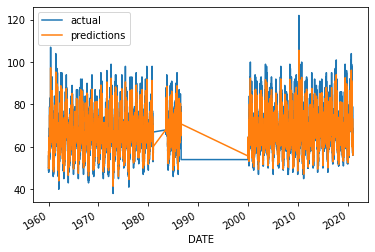

In [92]:
combined.plot()

In [93]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

# Create Func To Predict

In [98]:
def create_predictions(predictions, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc[:"2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"],predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis = 1)
    combined.columns = ["actual", "predictions"]
    return error, combined

# Add In Rolling Means

In [99]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [100]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


In [101]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [102]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [103]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [104]:
core_weather = core_weather.iloc[30:,:].copy()

In [105]:
error, combined = create_predictions(predictors, core_weather, reg)

In [106]:
error

3.3930536583101074

<AxesSubplot:xlabel='DATE'>

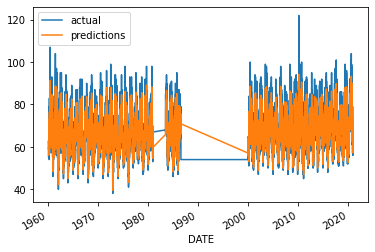

In [107]:
combined.plot()

# Add Monthly and Daily Averages

In [109]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [110]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955


In [111]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [112]:
predictors = ["precip", "temp_max", "temp_min", "month_max","month_day_max", "max_min", "day_of_year_avg","monthly_avg"]

In [113]:
error, combined = create_predictions(predictors, core_weather, reg)

In [114]:
error

3.36234213928244

# Running Model Diagnostics

In [115]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.08006707,   0.14343362])

In [116]:
core_weather.corr()["target"]

precip            -0.205413
temp_max           0.821650
temp_min           0.596016
target             1.000000
month_max          0.686842
month_day_max     -0.421537
max_min            0.045228
monthly_avg        0.689805
day_of_year_avg    0.712334
Name: target, dtype: float64

In [117]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [120]:
combined.sort_values("diff", ascending = False).head(10)

,actual,predictions,diff
DATE,,,
2010-03-06,122.0,62.641122,59.358878
2010-03-07,56.0,93.967781,37.967781
1961-06-13,104.0,75.923096,28.076904
2009-05-15,92.0,67.346359,24.653641
1975-05-27,96.0,72.471855,23.528145
2019-04-22,86.0,62.702440,23.297560
2020-09-09,68.0,90.081162,22.081162
1986-03-07,87.0,65.289744,21.710256
2001-05-29,94.0,72.868666,21.131334
